# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

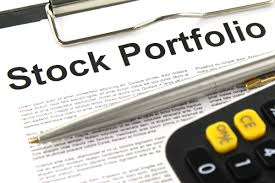

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (5 puntos).
4. Graficar los rendimientos (5 puntos).

In [1]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import scipy.optimize as opt

In [2]:
# Información
ticker= ['^GSPC', 'MSFT', 'WBA', 'TSLA']
start, end= '2011-01-01', '2015-12-31'

#Función rend diarios --> rendimientos anuales
def calc_annual_ret(ret):
    return (1+ret).groupby(lambda date: date.year).prod()-1 
#se suma 1 por ser rend
#los hace "clusters" por año y los multiplica 
# entre ellos, luego -1 por la fórmula de series

In [3]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [5]:
# Precios diarios
daily_closes = get_closes(ticker, start, end, freq='d') #d define es diario
daily_closes

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2011-01-03,1271.869995,22.912699,33.120098,26.620001
2011-01-04,1270.199951,23.002779,33.398075,26.670000
2011-01-05,1276.560059,22.929071,33.861340,26.830000
2011-01-06,1273.849976,23.600565,33.962425,27.879999
2011-01-07,1271.500000,23.420408,33.760262,28.240000
2011-01-10,1269.750000,23.109228,34.493088,28.450001
2011-01-11,1274.479980,23.019156,34.392010,26.959999
2011-01-12,1285.959961,23.379471,34.703655,26.959999
2011-01-13,1283.760010,23.084660,35.074276,26.219999


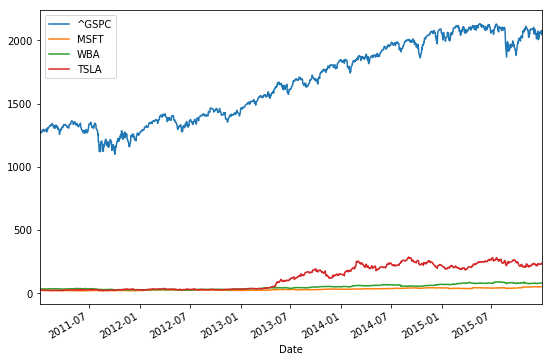

In [6]:
# Gráfico de histórico de precios diarios
daily_closes.plot(figsize=(9,6));

In [7]:
daily_closes.shift()
# Rendimientos Diarios. Otra forma (más fácil)
daily_ret=daily_closes.pct_change().dropna()
daily_ret

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2011-01-04,-0.001313,0.003931,0.008393,0.001878
2011-01-05,0.005007,-0.003204,0.013871,0.005999
2011-01-06,-0.002123,0.029286,0.002985,0.039135
2011-01-07,-0.001845,-0.007634,-0.005953,0.012913
2011-01-10,-0.001376,-0.013287,0.021707,0.007436
2011-01-11,0.003725,-0.003898,-0.002930,-0.052373
2011-01-12,0.009008,0.015653,0.009062,0.000000
2011-01-13,-0.001711,-0.012610,0.010680,-0.027448
2011-01-14,0.007385,0.003902,-0.004803,-0.017925


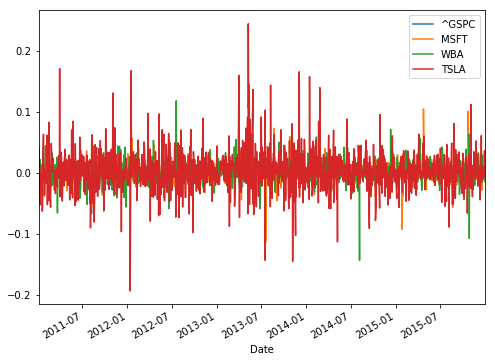

In [8]:
# Graficar rendimientos
daily_ret.plot(figsize=(8,6));

In [9]:
# Calcular rendimientos ANUALES y mostrar
annual_ret = calc_annual_ret(daily_ret)
annual_ret

,^GSPC,MSFT,WBA,TSLA
2011,-0.011220,-0.047546,-0.141398,0.072877
2012,0.134057,0.057989,0.152733,0.185924
2013,0.296012,0.442980,0.589405,3.441393
2014,0.113906,0.275646,0.359792,0.478495
2015,-0.007266,0.226919,0.136146,0.079133


## 2. Rendimiento esperado y volatilidad para cada activo (30 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).

2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos) 3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (10 puntos).

In [10]:
# E[R] Y VOL. DIARIOS
daily_ret_summary = pd.DataFrame(index= ['Mean Daily', 'Volatility Daily'], columns= ['MSFT','WBA','TSLA'])
daily_ret_summary.loc['Mean Daily']= daily_ret.mean()
daily_ret_summary.loc['Volatility Daily']= daily_ret.std()
daily_ret_summary

,MSFT,WBA,TSLA
Mean Daily,0.000763744,0.00083927,0.00229583
Volatility Daily,0.0147987,0.0162465,0.0332456


In [11]:
# E[R] Y VOL. ANUAL
annual_ret_summary = pd.DataFrame(index= ['Mean Annual', 'Volatility Annual'], columns=['MSFT','WBA','TSLA'])
annual_ret_summary.loc['Mean Annual']= daily_ret.mean()*252 #cambias la media diaria (Esperada) por 252 para anualizar
annual_ret_summary.loc['Volatility Annual']= daily_ret.std()*np.sqrt(252) 
annual_ret_summary

,MSFT,WBA,TSLA
Mean Annual,0.192464,0.211496,0.578548
Volatility Annual,0.234923,0.257905,0.527757


In [12]:
# MATRIZ DE COVARIANZA CON RENDIMIENTOS DIARIOS
cov_matrix = daily_ret.cov()
cov_matrix

,^GSPC,MSFT,WBA,TSLA
^GSPC,0.000095,0.000092,0.000075,0.000124
MSFT,0.000092,0.000219,0.000072,0.000120
WBA,0.000075,0.000072,0.000264,0.000083
TSLA,0.000124,0.000120,0.000083,0.001105


In [13]:
# MATRIZ DE CORRLECIÓN CON RENDIMIENTOS DIARIOS 
corr_matrix = daily_ret.corr()
corr_matrix

,^GSPC,MSFT,WBA,TSLA
^GSPC,1.000000,0.635636,0.471245,0.383444
MSFT,0.635636,1.000000,0.298437,0.243817
WBA,0.471245,0.298437,1.000000,0.153495
TSLA,0.383444,0.243817,0.153495,1.000000


## 3. Rendimiento esperado y volatilidad para portafolios (30 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (15 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (10 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [14]:
#PORTAFOLIOs (UTILIZANDO MI TABLA DE RENDIMIENTOS DIARIOS ANTERIOR)
port = pd.DataFrame(columns = ['GSPC','MSFT','WBA','TSLA', 'P1', 'P2','P3','P4',], index = daily_ret.index)
port.GSPC = daily_ret['^GSPC']
port.MSFT = daily_ret['MSFT']
port.WBA = daily_ret['WBA']
port.TSLA = daily_ret['TSLA']
port.P1 = (port.MSFT*(1/3) + port.WBA*(1/3) + port.TSLA*(1/3))
port.P2 = (port.MSFT*(.30) + port.WBA*(.20) + port.TSLA*(.50))
port.P3 = (port.MSFT*(.50) + port.WBA*(.30) + port.TSLA*(.20))
port.P4 = (port.MSFT*(.20) + port.WBA*(.50) + port.TSLA*(.30))
port

,GSPC,MSFT,WBA,TSLA,P1,P2,P3,P4
Date,,,,,,,,
2011-01-04,-0.001313,0.003931,0.008393,0.001878,0.004734,0.003797,0.004859,0.005546
2011-01-05,0.005007,-0.003204,0.013871,0.005999,0.005555,0.004813,0.003759,0.008094
2011-01-06,-0.002123,0.029286,0.002985,0.039135,0.023802,0.028950,0.023365,0.019090
2011-01-07,-0.001845,-0.007634,-0.005953,0.012913,-0.000225,0.002976,-0.003020,-0.000629
2011-01-10,-0.001376,-0.013287,0.021707,0.007436,0.005285,0.004073,0.001356,0.010427
2011-01-11,0.003725,-0.003898,-0.002930,-0.052373,-0.019734,-0.027942,-0.013302,-0.017957
2011-01-12,0.009008,0.015653,0.009062,0.000000,0.008238,0.006508,0.010545,0.007661
2011-01-13,-0.001711,-0.012610,0.010680,-0.027448,-0.009793,-0.015371,-0.008591,-0.005417
2011-01-14,0.007385,0.003902,-0.004803,-0.017925,-0.006276,-0.008753,-0.003075,-0.006999


In [47]:
# E[R] Y VOL. ANUAL (Conjunto de los Portafolios)
index_col = ['GSPC','MSFT','WBA','TSLA', 'P1', 'P2','P3','P4']
annual_port_summary = pd.DataFrame(index= ['Mean Annual', 'Volatility Annual'], columns= index_col)
annual_port_summary.loc['Mean Annual']= port.mean()*252 #cambias la media diaria (Esperada) por 252 para anualizar
annual_port_summary.loc['Volatility Annual']= port.std()*np.sqrt(252) 
annual_port_summary

,GSPC,MSFT,WBA,TSLA,P1,P2,P3,P4
Mean Annual,0.107092,0.192464,0.211496,0.578548,0.327503,0.389312,0.27539,0.317805
Volatility Annual,0.154583,0.234923,0.257905,0.527757,0.24464,0.304428,0.211901,0.239615


In [48]:
annual_port_summary_port=annual_port_summary[['P1', 'P2','P3','P4']]
annual_port_summary_port

,P1,P2,P3,P4
Mean Annual,0.327503,0.389312,0.27539,0.317805
Volatility Annual,0.24464,0.304428,0.211901,0.239615


 **E[R] AND VOL WITH CLASS FORMULAS. **

In [39]:
wP1 = np.array([1/3,1/3,1/3]).T
wP2 = np.array([0.3,0.2,0.5]).T
wP3 = np.array([0.5,0.3,0.2]).T
wP4 = np.array([0.2,0.5,0.3]).T
W = np.array([wP1, wP2, wP3, wP4]).T
W

array([[ 0.33333333,  0.3       ,  0.5       ,  0.2       ],
       [ 0.33333333,  0.2       ,  0.3       ,  0.5       ],
       [ 0.33333333,  0.5       ,  0.2       ,  0.3       ]])

In [40]:
# E[R] Y VOL. ANUAL (Matrix simplificada para uso de formulas y el .dot)
index_col = ['MSFT','WBA','TSLA']
annual_port_summary_matrix = pd.DataFrame(index= ['Mean Annual', 'Volatility Annual'], columns= index_col)
annual_port_summary_matrix.loc['Mean Annual']= port.mean()*252 #cambias la media diaria (Esperada) por 252 para anualizar
annual_port_summary_matrix.loc['Volatility Annual']= port.std()*np.sqrt(252) 
annual_port_summary_matrix

,MSFT,WBA,TSLA
Mean Annual,0.192464,0.211496,0.578548
Volatility Annual,0.234923,0.257905,0.527757


In [41]:
Eport = annual_port_summary_matrix.loc['Mean Annual'].dot(W)
Eport

array([0.32750258874714366, 0.38931237518650363, 0.27539022161672333,
       0.317805169438204], dtype=object)

In [42]:
cov_matrix2 = daily_ret2.cov() #ajustando el tamaño de matrices
stdPort1=np.sqrt(252*wP1.dot(cov_matrix2).dot(wP1))
stdPort2=np.sqrt(252*wP2.dot(cov_matrix2).dot(wP2))
stdPort3=np.sqrt(252*wP3.dot(cov_matrix2).dot(wP3))
stdPort4=np.sqrt(252*wP4.dot(cov_matrix2).dot(wP4))
stdPort1,stdPort2,stdPort3,stdPort4

(0.24463972256421943,
 0.30442812676024089,
 0.21190088114433506,
 0.23961491629792411)

**Tanto el cálculo por tabla como por fórmula, provee los mismos datos numéricos de la E[r] y la Vol**

## 4. Gráfico de rendimientos esperados vs. volatilidad (20 puntos)

Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente.

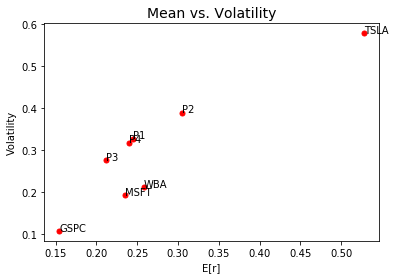

In [49]:
x = annual_port_summary.loc['Volatility Annual'].values
y = annual_port_summary.loc['Mean Annual'].values
plt.figure(figsize=(6,4))
#Axis labels
plt.title('Mean vs. Volatility',fontsize=14)
plt.xlabel('E[r]')
plt.ylabel('Volatility')
#Point labels with FOR STATEMENT
for i in range(8):
    plt.text(x[i],y[i],index_col[i])
#Plot
plt.plot(x,y,'ro',ms=5)


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>